# Lecture 11: Poisson Distribution and Approximation


## Stat 110, Prof. Joe Blitzstein, Harvard University

----

## Sympathetic Magic, or _[Confusing the map for the territory](http://nobeliefs.com/MapandTerritory.htm)_

### Don't mistake a random variable for its distribution

As a case in point, say we have two random variables $X$ and $Y$.

\begin{align}
  P(X + Y) \ne P(X=x) + P(Y=y)
\end{align}

Claiming equality is clearly nonsense, since $X + Y$ is itself a random variable, and it should be recognized that $P(X=x) + P(Y=y)$ can exceed 1.

### Think of them as houses &amp; blueprints

Metaphorically, the distribution is the _blueprint_, and the random variable is the _house_.

----

## Poisson Distribution

### Description

The single most often used real-world discrete model. Applicable when there are a _large number of trials_ with a _small probability of success in each trial_.

Note that the probability of success in each trial does _not_ have to be the same in each trial (unlike $Bin(n,p)$).

The Poisson distribution expresses the probability of a given number of events occurring in a fixed interval of time and/or space, if these events occur with a known average _rate_ and independently of the time since the last event. The Poisson distribution can also be used for the number of events in other specified intervals such as distance, area or volume.

Examples might be counting:

- e-mails coming into your mailbox in an hour
- buses following the same route arriving at a bus-stop in a day
- natural phenomena, like earthquakes or meteor sightings, etc., in a month
- chips in a chocolate-chip cookie (area/volume)


### Notation

$X \sim Pois(\lambda)$

### Parameters

$\lambda$ - the average number of events per interval (rate), where $\lambda \gt 0$

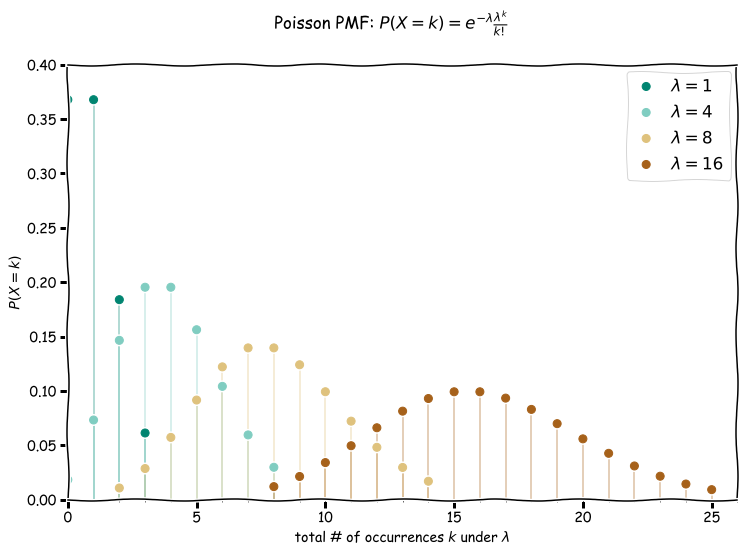

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from scipy.stats import poisson

%matplotlib inline

plt.xkcd()
_, ax = plt.subplots(figsize=(12,8))

# seme Poisson parameters
lambda_values = [1, 4, 8, 16]

# colorblind-safe, divergent color scheme
colors = ['#018571', '#80cdc1', '#dfc27d', '#a6611a']

for i,l in enumerate(lambda_values):
    x = np.arange(poisson.ppf(0.01, l), poisson.ppf(0.99, l))
    pmf = poisson.pmf(x, l)
    ax.plot(x, pmf, 'o', color=colors[i], ms=8, label=r'$\lambda={}$'.format(l))
    ax.vlines(x, 0, pmf, lw=2, color=colors[i], alpha=0.3)

# legend styling
legend = ax.legend()
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)

# y-axis
ax.set_ylim([0.0, 0.4])
ax.set_ylabel(r'$P(X=k)$')

# x-axis
ax.set_xlim([0, 26])
ax.set_xlabel(r'total # of occurrences $k$ under $\lambda$')

# x-axis tick formatting
majorLocator = MultipleLocator(5)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(1)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)
ax.xaxis.set_minor_locator(minorLocator)

plt.suptitle(r'Poisson PMF: $P(X = k) = e^{-\lambda} \frac{\lambda^k}{k!}$')

plt.show()

### Probability mass function

\begin{align}
  P(X = k) = e^{-\lambda} \frac{\lambda^k}{k!} ~~ \text{, where } k \in \{0,1,2,\dots,\}
\end{align}

Checking the validity of this PMF it is easy to see that it is always non-negative.

Furthermore,

\begin{align}
  \sum_{k=0}^{\infty} P(X = k) &= \sum_{k=0}^{\infty} e^{-\lambda} \frac{\lambda^k}{k!} \\
  &= e^{-\lambda} \sum_{k=0}^{\infty} \frac{\lambda^k}{k!} & &\text{since } e^{-\lambda} \text{ is constant} \\ 
  &= e^{-\lambda} e^{\lambda} & &\text{recall Taylor series for } e^{\lambda} \\
  &= 1 ~~~~ \blacksquare
\end{align}

### Expected value

\begin{align}
  \mathbb{E}(X) &= \sum_{k=0}^{\infty} k ~~ e^{-\lambda} \frac{\lambda^k}{k!} \\
  &= e^{-\lambda} \sum_{k=1}^{\infty} k \frac{\lambda^k}{k!} \\
  &= e^{-\lambda} \sum_{k=1}^{\infty} \frac{\lambda^k}{(k-1)!} \\
  &= \lambda e^{-\lambda} \sum_{k=1}^{\infty} \frac{\lambda^{k-1}}{(k-1)!} \\
  &= \lambda e^{-\lambda} e^{\lambda} \\
  &= \lambda ~~~~ \blacksquare
\end{align} 

----

## Poisson Paradigm (Approximate)

Suppose we have:

1. a lot of events $A_1, A_2, \dots, A_n$, with $P(A_j) = p$
1. number of trials $n$ is very large
1. $p$ is very small

The events could be _independent_ (knowing that $A_1$ occurred has no bearing whatsoever on $A_2$.

They could even be _weakly dependent_ ($A_1$ occurring has some level of affect on the likelihood of $A_2$).

Either way, the expected number of events $A_j$ occurring is approximately $Pois(\lambda)$, and by Linearity

\begin{align}
  \mathbb{E}(A) &= \lambda = \sum_{j=1}^n p_j
\end{align}

### Relating the Binomial distribution to the Poisson

This example will relate the Binomial distribution to the Poisson distribution.

Suppose we have $X \sim Bin(n,p)$, and let $n \rightarrow \infty$, $p \rightarrow 0$. 

We will hold $\lambda = np$ constant, which will let us see what happens to the Binomial distribution when the number of trails approaches $\infty$ while the probabability of success $p$ gets very small.

Specifically let's see what happens to the Binomial PMF under these conditions.

\begin{align}
  P(X = k) &= \binom{n}{k} p^k q^{n-k} ~~~~ \text{where k is fixed} \\
  &= \underbrace{\frac{n (n-1) \dots (n-k+1)}{k!} \left(\frac{\lambda}{n}\right)^k}_{\text{n terms cancel out}} ~~ \underbrace{\left(1 - \frac{\lambda}{n}\right)^n}_{\text{continuous compounding and e}} ~~ \underbrace{\left(1 - \frac{\lambda}{n}\right)^{-k}}_{\text{goes to 1}}   \\
  \\
  &\rightarrow \frac{\lambda^k}{k!} e^{-\lambda} ~~ \text{which is the Poisson PMF at k}
\end{align}


### Thought-experiment: counting raindrops

Let's say we want to count the number of raindrops that fall on a certain area on the ground.

We could divide this area with a grid, with each grid cell being very, very tiny. 

Therefore:

- the number grid cells is very, very large
- the probability of a rain drop landing in an arbitrary cell is very, very small

_What distribution could we use to model this situation?_


#### How about $X \sim Bin(n,p)$?
Considering the Binomial distribution, we would have to make certain assumptions:

1. the event of a raindrop hitting a cell is independent of other events
1. the probability $p$ of a raindrop hitting an arbitrary cell is identical. 

While it might be OK to make these assumptions, but one **big** stumbling block in using the Binomial is that we would end up calculating factorials of a very large $n$, which even for a computer would be problematic.

#### How about $X \sim Pois(\lambda)$?

The Poisson distribution is a better model approximation than the Binomial, since

1. no factorials involved, so much simpler than the Binomial
1. we can deal with the case where more than one raindrop lands in a cell
1. we don't need to make any assumption on $p$ being identical

#### Example: Graph comparing $X \sim Bin(n,p)$ vs $X \sim Pois(\lambda = np)$ where $n = 1e^{6}$ and $p = 1e^{-5}$

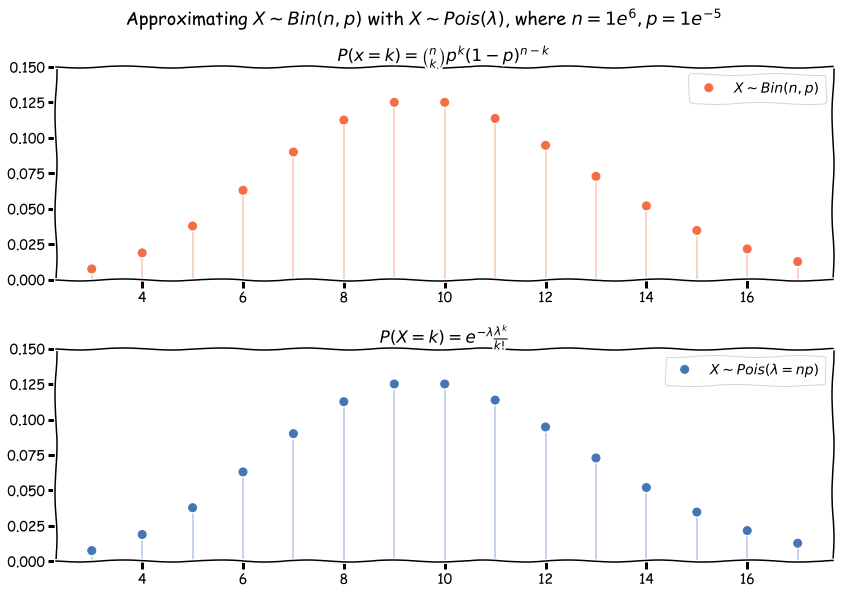

In [2]:
from scipy.stats import binom

plt.xkcd()

fig = plt.figure(figsize=(12,8))

# Binomial parameters
n = 1e6
p = 1e-5

x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))

# plot Bin(n,np)
binom_pmf = binom.pmf(x, n, p)
ax1 = fig.add_subplot(211)
ax1.plot(x, binom_pmf, 'o', ms=8, color='#f46d43', label=r'$X \sim Bin(n,p)$')
ax1.vlines(x, 0, binom_pmf, lw=2, color='#f46d43', alpha=0.3)
ax1.set_title(r'$P(x=k) = \binom{n}{k} p^k (1-p)^{n-k}$')
ax1.legend(loc="upper right")

# y-axis
ax1.set_ylim([0.0, 0.15])

# plot Pois(np)
pois_pmf = poisson.pmf(x, n*p)
ax2 = fig.add_subplot(212)
ax2.plot(x, pois_pmf, 'o', ms=8, color='#4575b4', label=r'$X \sim Pois(\lambda = np)$')
ax2.vlines(x, 0, pois_pmf, lw=2, color='#4575b4', alpha=0.3)
ax2.set_title(r'$P(X = k) = e^{-\lambda} \frac{\lambda^k}{k!}$')
ax2.legend(loc="upper right")

# y-axis
ax2.set_ylim([0.0, 0.15])

fig.tight_layout()

st = fig.suptitle(r'Approximating $X \sim Bin(n,p)$ with $X \sim Pois(\lambda)$, where $n=1e^{6}, p=1e^{-5}$', fontsize=18)
st.set_y(1.035)

----

## Birthdays, revisited: triple matches

Suppose we have $n$ people, and we want to know the _approximate probability_ that there are 3 people among the $n$ who share the same birthday.

Doing this the way we did in Lecture 3 is possible, but it would get very messy.

Let's set up the problem first.

- there are $\binom{n}{3}$ triplets
- we used indicator r.v. $I_{ijk} \text{, where } i < j < k$
- $\Rightarrow \mathbb{E}(\# \text{ triple matches}) = \binom{n}{3} \frac{1}{365^2}$ 

But we are interested in the _approximate probability_ of triple matches, so now let's use the Poisson. 

_Why?_

1. we expect the total number of trials $\binom{n}{3}$ to be very large
1. the probability $P(I_{ijk}$ is very small
1. events are _weakly dependent_, since if persons $1$ and $2$ are already known to share a birthday, then  $I_{123} \text{, } I_{124}$ are not completely independent

We claim that these circumstances are _approximately_ $Pois(\lambda)$ with $\lambda = \mathbb{E}(\# \text{ triple matches})$.

Let $X = \text{# triple matches}$

\begin{align}  
  P(X \ge 1) &= 1 - P(X=0) \\
  &\approx 1 - e^{-\lambda} \frac{\lambda^0}{0!} \\
  &= 1 - e^{-\lambda} ~~~~ \text{where you just plug in } \lambda = \binom{n}{3} \frac{1}{365^2} ~~~~ \blacksquare
\end{align}

----

View [Lecture 11: The Poisson distribution | Statistics 110](http://bit.ly/2Pn99BO) on YouTube.